<a href="https://colab.research.google.com/github/Ameena1BM23CS27/6thSem-ML-Lab/blob/main/LogisticRegression_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zoo Dataset Shape: (101, 18)
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1      

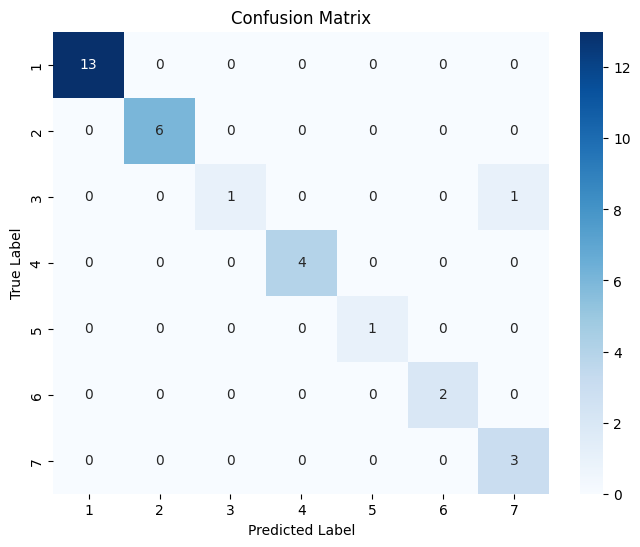

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# 1. Load Dataset
# -----------------------------

# Load zoo dataset
zoo_data = pd.read_csv("zoo-data.csv")

# Load class type description file (optional – for mapping labels)
class_type = pd.read_csv("zoo-class-type.csv")

print("Zoo Dataset Shape:", zoo_data.shape)
print(zoo_data.head())

# -----------------------------
# 2. Data Preprocessing
# -----------------------------

# Drop animal name column (not useful for prediction)
if 'animal_name' in zoo_data.columns:
    zoo_data.drop('animal_name', axis=1, inplace=True)

# Separate features and target
X = zoo_data.drop('class_type', axis=1)
y = zoo_data['class_type']

# Feature Scaling (important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------------
# 4. Build Logistic Regression Model
# -----------------------------
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# -----------------------------
# 5. Predictions
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# 6. Model Accuracy
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------
# 7. Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Model Accuracy: 0.967741935483871

Confusion Matrix:
[[17, 0], [1, 13]]


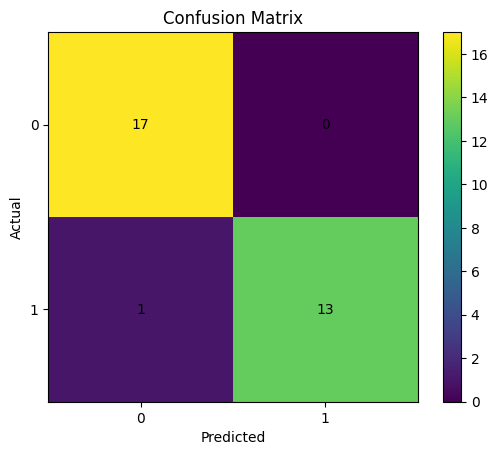

In [10]:
import csv
import math
import random
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load Dataset Manually
# -----------------------------
def load_data(filename):
    dataset = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            dataset.append(row)
    return dataset

data = load_data("zoo-data.csv")

# Remove header if present
if not data[0][1].isdigit():
    data = data[1:]

# Remove animal_name column (first column)
for row in data:
    row.pop(0)

# Convert all values to float
for row in data:
    for i in range(len(row)):
        row[i] = float(row[i])

# -----------------------------
# 2. Split Features & Target
# -----------------------------
X = []
y = []

for row in data:
    X.append(row[:-1])      # features
    y.append(int(row[-1]))  # class_type

# Convert class labels to binary (example: class 1 vs others)
# For full multi-class, one-vs-rest logic is required
y_binary = [1 if label == 1 else 0 for label in y]

# -----------------------------
# 3. Train-Test Split (70-30)
# -----------------------------
def train_test_split(X, y, test_ratio=0.3):
    combined = list(zip(X, y))
    random.shuffle(combined)

    split_index = int(len(combined) * (1 - test_ratio))
    train = combined[:split_index]
    test = combined[split_index:]

    X_train, y_train = zip(*train)
    X_test, y_test = zip(*test)

    return list(X_train), list(X_test), list(y_train), list(y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary)

# -----------------------------
# 4. Logistic Regression From Scratch
# -----------------------------

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

# Initialize weights
def initialize_weights(n_features):
    return [0.0] * n_features

# Train using Gradient Descent
def train_logistic(X, y, lr=0.01, epochs=1000):
    weights = initialize_weights(len(X[0]))

    for _ in range(epochs):
        for i in range(len(X)):
            z = sum(weights[j] * X[i][j] for j in range(len(weights)))
            prediction = sigmoid(z)
            error = y[i] - prediction

            # Update weights
            for j in range(len(weights)):
                weights[j] += lr * error * X[i][j]

    return weights

# Train model
weights = train_logistic(X_train, y_train)

# -----------------------------
# 5. Prediction
# -----------------------------
def predict(X, weights):
    predictions = []
    for row in X:
        z = sum(weights[j] * row[j] for j in range(len(weights)))
        prob = sigmoid(z)
        predictions.append(1 if prob >= 0.5 else 0)
    return predictions

y_pred = predict(X_test, weights)

# -----------------------------
# 6. Accuracy
# -----------------------------
def accuracy(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_true)

acc = accuracy(y_test, y_pred)
print("Model Accuracy:", acc)

# -----------------------------
# 7. Confusion Matrix
# -----------------------------
def confusion_matrix(y_true, y_pred):
    tp = tn = fp = fn = 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            tn += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            fn += 1

    return [[tn, fp],
            [fn, tp]]

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)

# -----------------------------
# 8. Plot Confusion Matrix
# -----------------------------
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i][j], ha='center', va='center')

plt.show()